# 로지스틱 회귀(Logistic Regression)

시험을 봤을 때, 합격인지 불합격인지, 메일을 받았을 때 정상 메일인지 스팸 메일인지 둘 중 하나를 결정하는 문제를 겪어볼 수 있다. 이렇게 둘 중 하나를 결정하는 문제를 **이진 분류(Binary Classification)**라고 한다.

그리고 이러한 이진 분류를 풀기 위한 알고리즘으로 **로지스틱 회귀(Logistic Regression)**을 사용한다.


## 이진 분류(BInary Classification)


- **예제 데이터**

자격증은 60점 이상이 되어야 합격, 미만일경우 불합격이다. 자격증 시험 성적이 x라면, 합격 불합격 여부는 y인 데이터를 임의로 생성했다.

- **목표**

생성한 데이터로부터 특정 점수를 얻었을 때의 합, 불합 여부를 판정하는 모델을 만들고자 한다.

|Score(x)|result(y)|
|---|---|
|30|불합격|
|36|불합격|
|42|불합격|
|46|불합격|
|52|불합격|
|44|불합격|
|56|불합격|
|58|불합격|
|56|불합격|
|62|합격|
|70|합격|
|80|합격|
|64|합격|
|62|합격|
|76|합격|
|72|합격|
|70|합격|

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

## 데이터셋 생성

In [21]:
dic = {30:"불합격",36:"불합격",42:"불합격",46:"불합격",52:"불합격",44:"불합격",56:"불합격",58:"불합격",
       56:"불합격",58:"불합격",56:"불합격",62:"합격",70:"합격",80:"합격",64:"합격",62:"합격",76:"합격",
      72:"합격",70:"합격"}

data = pd.DataFrame(dic.items(), columns = ['score','result'])

In [26]:
data.head()

,score,result
0,30,불합격
1,36,불합격
2,42,불합격
3,46,불합격
4,52,불합격


In [27]:
# 합격을 1 불합격을 0으로
data['result']= data.result.apply(lambda x : 1 if x == "합격" else 0)

## 데이터 시각화

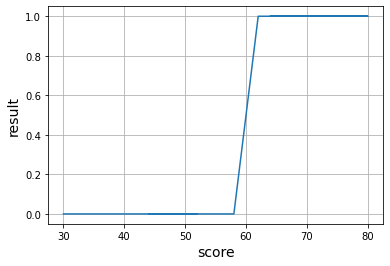

In [39]:
plt.plot(data['score'],data['result'])
plt.grid()
plt.xlabel('score', fontsize = 14)
plt.ylabel('result', fontsize = 14)
plt.show()

**이진 분류에서의 그래프는 S자 형태**로 표현된다. 이러한 x와 y의 관계를 설명하기 위해선 하나의 직선 함수로는 반영하기가 어려우며 분류 작업이 잘 작동하지 않는다.

로지스틱 회귀 가설에서는 선형 회귀 때의 $H(x) = W_x + b$가 아닌 S자 모양의 그래프를 만들 수 있는 $f$를 추가적으로 사용하여 $H(x) = f(W_x + b)$를 사용한다. 이때 사용하는 $f$가 **시그모이드 함수**이다.

## 시그모이드 함수(Sigmoid Function)

### $$ H(x) = sigmoid(W_x + b) = {1 \over 1 + e^-(W_x + b)}$$

선형 회귀에서 최적의 $W$와 $b$를 찾는 것이 목표였듯, 시그모이드에서도 마찬가지다.

그렇다면 시그모이드에의 $W$와 $b$가 무엇을 의미하는지 그래프로 확인하자.

In [41]:
# 시그모이드 정의
def sigmoid(x) :
    return 1/(1+np.exp(-x))

### $W$가 1이고 $b$가 0인 그래프

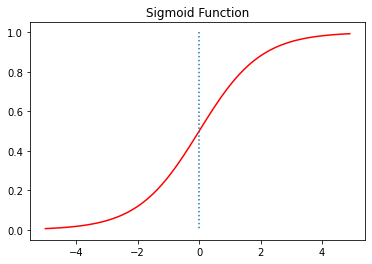

In [42]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y, 'r')
plt.plot([0,0],[1.0,0.0], ':') # 0을 기준점
plt.title('Sigmoid Function')
plt.show()

**x가 0일 때 0.5의 값을 가진다.**

**또한, x가 작아지면 0에 수렴하고, x가 커지면 1에 수렴한다.**

### $W$값 변화

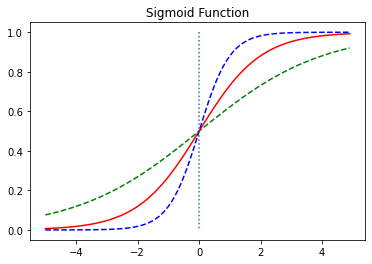

In [46]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(0.5*x)
y1 = sigmoid(x)
y2 = sigmoid(2*x)

plt.plot(x, y,'g', linestyle = '--')
plt.plot(x, y1,'r')
plt.plot(x, y2,'b',linestyle = '--')
plt.plot([0,0],[1,0],':')
plt.title('Sigmoid Function')
plt.show()

**$W$의 변화에 따라 그래프의 경사도가 변한다** 선형 회귀에서는 가중치 $W$가 직선의 기울기를 의미했지만 로지스틱에서는 **그래프의 경사도**를 결정한다.

$W$의 값이 커지면 경사가 커지고, $W$의 값이 작아지면 경사가 작아진다.

### $b$값 변화

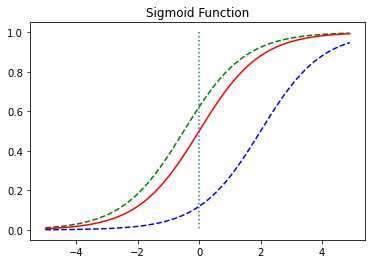

In [48]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x + 0.5)
y1 = sigmoid(x)
y2 = sigmoid(x - 2)

plt.plot(x, y,'g', linestyle = '--')
plt.plot(x, y1,'r')
plt.plot(x, y2,'b',linestyle = '--')
plt.plot([0,0],[1,0],':')
plt.title('Sigmoid Function')
plt.show()

**$b$를 변화시키면 그래프가 좌, 우로 이동하는 것을 볼 수 있다.** 

$b$가 커지면 좌측으로, $b$가 작아지면 우측으로 이동한다.

시그모이드는 x가 커질수록 1에 수렴하고, x가 작아질수록 0에 수렴한다. y는 항상 0과 1사이의 값을 가지는데 이 특성을 이용하면 분류 작업에 사용할 수 있다. 
